<a href="https://colab.research.google.com/github/Navidsaliya/15Martch-Multiple-regression/blob/main/Multiple_linier_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#First import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#Then import required data

dataset=pd.read_csv('/content/Data.csv')

In [ ]:
dataset.head(10)

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [ ]:
dataset.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


In [ ]:
#Independant and dependant variable (There can be more independant variable but only one dependant)

In [ ]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [ ]:
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [ ]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan,strategy='mean')
imputer = imputer.fit(x[:,1:3]) #It will fit or impute or replace missing values
x[:,1:3] = imputer.transform(x[:,1:3]) #Transform to DF

In [ ]:
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [ ]:

dataset.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [ ]:
#Encoding indipendant variable 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
#the kind of transformation=encoder 2.what type of encoding
x=np.array(ct.fit_transform(x))

In [ ]:
x

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [ ]:
#Encoading Categorical Data like 0-No 1-Yes
from sklearn.preprocessing import LabelEncoder
lable_y=LabelEncoder()
y=lable_y.fit_transform(y)


In [ ]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [ ]:
#Spliting the dataset into the training set and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size =0.2, random_state=125)

In [ ]:
x_test

array([[1.0, 0.0, 0.0, 37.0, 67000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0]], dtype=object)

In [ ]:
y_train

array([0, 0, 1, 1, 0, 0, 1, 0])

In [ ]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

In [ ]:
x_train

array([[ 1.29099445, -0.77459667, -0.57735027,  0.5678988 ,  0.61885324],
       [-0.77459667, -0.77459667,  1.73205081, -0.27277029, -1.24158238],
       [-0.77459667,  1.29099445, -0.57735027, -0.07601795, -0.14599252],
       [ 1.29099445, -0.77459667, -0.57735027, -0.88091389, -0.68345169],
       [-0.77459667, -0.77459667,  1.73205081, -0.39797633, -0.40438635],
       [-0.77459667,  1.29099445, -0.57735027,  1.53377393,  1.64209282],
       [ 1.29099445, -0.77459667, -0.57735027,  1.21181555,  1.2700057 ],
       [-0.77459667,  1.29099445, -0.57735027, -1.68580983, -1.05553882]])

In [ ]:
x_test

array([[ 1.29099445, -0.77459667, -0.57735027, -0.55895551,  0.15374433],
       [-0.77459667, -0.77459667,  1.73205081, -2.16874739, -1.6136695 ]])

In [ ]:
#From here regression testing

In [ ]:
#First import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset=pd.read_csv('/content/Salary_Data.csv')

In [ ]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
#Indipendant variables

In [ ]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [ ]:
#Spliting the dataset into the training set and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size =0.2, random_state=0)

In [ ]:
x_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7]])

In [ ]:
x_train

array([[ 9.6],
       [ 4. ],
       [ 5.3],
       [ 7.9],
       [ 2.9],
       [ 5.1],
       [ 3.2],
       [ 4.5],
       [ 8.2],
       [ 6.8],
       [ 1.3],
       [10.5],
       [ 3. ],
       [ 2.2],
       [ 5.9],
       [ 6. ],
       [ 3.7],
       [ 3.2],
       [ 9. ],
       [ 2. ],
       [ 1.1],
       [ 7.1],
       [ 4.9],
       [ 4. ]])

In [ ]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
#Predicting the test results

y_pred= regressor.predict(x_test)

In [ ]:
y_pred #Predicted values

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [ ]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431.])

In [ ]:
y_pred-y_test #compairing data predicted vs Actual

array([ 3017.96184072,   308.62295594,  7880.65717022,  -118.85785513,
       -1719.43714544, -1631.49724683])

In [ ]:

from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score
mae=mean_absolute_error(y_true=y_test,y_pred=y_pred)

mse=mean_squared_error(y_true=y_test,y_pred=y_pred)

rmse=mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)

mape=mean_absolute_percentage_error(y_true=y_test,y_pred=y_pred)

rsquare=r2_score(y_true=y_test,y_pred=y_pred)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("MAPE:",mape)
print("ADJ.RSQUARE:",rsquare)

MAE: 2446.1723690465055
MSE: 12823412.298126549
RMSE: 3580.979237321343
MAPE: 0.042009635296206715
ADJ.RSQUARE: 0.988169515729126


In [ ]:
#CORRELATION BET VARIABLE
dataset.corr()


,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


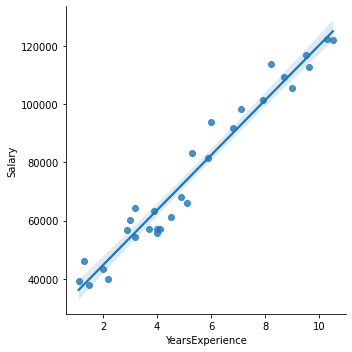

In [ ]:
#DATA VISUALIZATION
import seaborn as sns
sns.lmplot(x="YearsExperience",y="Salary",data=dataset)

In [ ]:
#
import statsmodels.formula.api as smf
model=smf.ols("Salary~YearsExperience",data=dataset).fit()


In [ ]:
#
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [ ]:
#pred for 20 and 30
newdata=pd.Series([20,30])
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])
data_pred

,YearsExperience
0,20
1,30


In [ ]:
model.predict(data_pred)

0    214791.446628
1    309291.069842
dtype: float64

In [ ]:
regressor.predict(data_pred)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([213031.60168521, 306157.3529525 ])